## Module 1 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the Module 1 video lectures.

### Using the `requests` library to query an API
Here's the code that we saw in the video lecture that queries BART for real-time arrivals.

In [1]:
import json
import pandas as pd
import requests

APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website
station = 'CIVC'
# string passing into the API 
requestString = 'http://api.bart.gov/api/etd.aspx?cmd=etd&orig={}&json=y&key={}&dir=s'.format(station, APIkey) 
r = requests.get(requestString)
d = json.loads(r.text)
etd = d['root']['station'][0]['etd']
print('Trains from {} to {}'.format(station, etd[0]['destination']))
df = pd.DataFrame(etd[0]['estimate'])
df

Trains from CIVC to Daly City


,minutes,platform,direction,length,color,hexcolor,bikeflag,delay,cancelflag,dynamicflag
0,3,1,South,8,BLUE,#0099cc,1,0,0,0
1,16,1,South,8,GREEN,#339933,1,0,0,0
2,33,1,South,8,BLUE,#0099cc,1,0,0,0


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Explore the different objects. What are <strong>r</strong>, <strong>d</strong>, and <strong>etd</strong>. What can you do with them?
</div>

Hint: Use `type()` to find out the type of an object (e.g. `type(r)`), and `?` to pull up the help screen (e.g. `r?`).

You can also tab autocomplete to discover an object's attributes and methods (e.g. `r.` and then `TAB`). 

In [2]:
type(r)

requests.models.Response

In [3]:
r

<Response [200]>

In [4]:
type(d)

dict

In [5]:
type(etd)

list

<div class="alert alert-block alert-success"> <b>Response to Exersice</b> In this, <strong>r</strong> is a request variable that stores the data recieved from the response to the get request. <strong>d</strong> is a dictionary that converts the response into a json format data. <strong>etd</strong> is a list within the dictionary <strong>d</strong>, where each item of the list is a train departing from the station. </div>

Now let's explore the other options and API commands that BART offers. 

The API documentation for the `etd` (real-time information) command is [here](https://api.bart.gov/docs/etd/etd.aspx). 

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Write a command to retrieve real-time departures for southbound trains at Civic Center station (code: CIVC). Hint: You'll need to add another <strong>&</strong> to <strong>requestString</strong>.
</div>

In [6]:
# your code here
direction = 's'
requestString = 'http://api.bart.gov/api/etd.aspx?cmd=etd&orig={}&json=y&key={}&dir={}'.format(station, APIkey, direction) 
r = requests.get(requestString)
d = json.loads(r.text)
etd = d['root']['station'][0]['etd']
print('Trains from {} to {}'.format(station, etd[0]['destination']))
df = pd.DataFrame(etd[0]['estimate'])
df

Trains from CIVC to Daly City


,minutes,platform,direction,length,color,hexcolor,bikeflag,delay,cancelflag,dynamicflag
0,3,1,South,8,BLUE,#0099cc,1,0,0,0
1,16,1,South,8,GREEN,#339933,1,0,0,0
2,33,1,South,8,BLUE,#0099cc,1,0,0,0


<div class="alert alert-block alert-success"> <b>Response to Exersice</b> This code reveals the real time departure for southbound trains only. We added direction as a input variable in the API request. </div>

<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Use the <strong>elev</strong> command to obtain the elevator status at each station, and put it in a dataframe. Optional extension: pass the parameters as a dictionary to requests, as we saw in the video lecture.

See the API docs [here](https://api.bart.gov/docs/bsa/elev.aspx) for details of that command.

In [49]:
# your code here
# your code here
requestString = 'https://api.bart.gov/api/bsa.aspx?cmd=elev&key={}&json=y'.format(APIkey) 
r_ele = requests.get(requestString)
d_ele = json.loads(r_ele.text)
d_ele

{'?xml': {'@version': '1.0', '@encoding': 'utf-8'},
 'root': {'@id': '1',
  'uri': {'#cdata-section': 'http://api.bart.gov/api/bsa.aspx?cmd=elev&json=y'},
  'date': '04/09/2023',
  'time': '06:50:20 PM PDT',
  'bsa': [{'@id': '04090651',
    'station': 'BART',
    'type': 'ELEVATOR',
    'description': {'#cdata-section': 'There are 5 elevators out of service at this time: 12TH: Street - Ogawa Plaza; COLS: Walkway - Coliseum; NBRK: Station; PITT: Platform - SF/East Bay; RICH: Street (West side)'},
    'sms_text': {'#cdata-section': '5 elevs out of svc: 12TH: street - ogawa plaza; COLS: walkway - COLS; NBRK: stn; PITT: plat - sf/East Bay; rich: street (west side)'},
    'posted': '',
    'expires': ''}],
  'message': ''}}

<div class="alert alert-block alert-success"> <b>Exersice in progress</b> It shows that d1 is a dictionary. The value we want, elevator status is the list description, within the dictionary bsa, which is within the dictionary root inside d1. We will call the relevant list and try to convert it into a data frame. . </div>

In [50]:
ele = d_ele['root']['bsa'][0]['description']['#cdata-section']
ele

'There are 5 elevators out of service at this time: 12TH: Street - Ogawa Plaza; COLS: Walkway - Coliseum; NBRK: Station; PITT: Platform - SF/East Bay; RICH: Street (West side)'

<div class="alert alert-block alert-success"> <b>Exersice in progress</b> This shows that we can convert the dictionray bsa into a list where each dection is dcata-section. However, we probably need the values in description to do this neater. </div>

In [51]:
type(ele[0])

str

In [52]:
ele

'There are 5 elevators out of service at this time: 12TH: Street - Ogawa Plaza; COLS: Walkway - Coliseum; NBRK: Station; PITT: Platform - SF/East Bay; RICH: Street (West side)'

<div class="alert alert-block alert-success"> <b>Exersice in progress</b> The reslut for <strong>ele</strong> show that the value is a string, and we need to use other ways to seperate it out into a data frame. </div>

In [53]:
ele_columns=ele.split(";")
ele_columns

['There are 5 elevators out of service at this time: 12TH: Street - Ogawa Plaza',
 ' COLS: Walkway - Coliseum',
 ' NBRK: Station',
 ' PITT: Platform - SF/East Bay',
 ' RICH: Street (West side)']

In [59]:
ele_df=pd.DataFrame(ele_columns, columns=["Elevator"] )
ele_df

,Elevator
0,There are 5 elevators out of service at this t...
1,COLS: Walkway - Coliseum
2,NBRK: Station
3,PITT: Platform - SF/East Bay
4,RICH: Street (West side)


In [60]:
# split the Elevator column by ':'
ele_df[['Station','Location','q']] = ele_df['Elevator'].str.split(':', n=2, expand=True)

ele_df

,Elevator,Station,Location,q
0,There are 5 elevators out of service at this t...,There are 5 elevators out of service at this time,12TH,Street - Ogawa Plaza
1,COLS: Walkway - Coliseum,COLS,Walkway - Coliseum,None
2,NBRK: Station,NBRK,Station,None
3,PITT: Platform - SF/East Bay,PITT,Platform - SF/East Bay,None
4,RICH: Street (West side),RICH,Street (West side),None


In [61]:
# drop the original Elevator column
ele_df.at[0,'Station']=ele_df.at[0,'Location']
ele_df.at[0,'Location']=ele_df.at[0,'q']
ele_df = ele_df.drop('q', axis=1)
ele_df = ele_df.drop('Elevator', axis=1)
ele_df

,Station,Location
0,12TH,Street - Ogawa Plaza
1,COLS,Walkway - Coliseum
2,NBRK,Station
3,PITT,Platform - SF/East Bay
4,RICH,Street (West side)


In [63]:
# Alternative from kushal
ele_df1=pd.DataFrame(columns=['Station','Location'])

ele_df1=pd.DataFrame(d_ele['root']['bsa'][0]['description']['#cdata-section'].split('time:')[1].split(';'), columns=["Elevator"] )

ele_df1[['Station','Location']] = ele_df1['Elevator'].str.split(':', n=1, expand=True)
ele_df1 = ele_df1.drop('Elevator', axis=1)

ele_df1

,Station,Location
0,12TH,Street - Ogawa Plaza
1,COLS,Walkway - Coliseum
2,NBRK,Station
3,PITT,Platform - SF/East Bay
4,RICH,Street (West side)


<div class="alert alert-block alert-success"> <b>Response to Exersice</b> We get a table with all stations and elevator locations that are not functioning. Tho there is a little hard coding, it is robust enough to adapt to changes in # elevators . </div>

### Accessing census data

Recall that we have seen two ways to access census data:
* The Census Bureau API
* The `cenpy` library

Let's try them both and map patterns of race for Los Angeles County. 

Here's the relevant code that we saw in the video lecture to get the 5-year ACS estimates for population (table `B01001_001E`).

In [48]:
import json
import requests
import pandas as pd

r_census = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=county')
censusdata = r_census.json()
df_census = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df_census.head()

,B01001_001E,state,county
0,7059,48,075
1,119632,48,091
2,22949,48,225
3,48118,48,349
4,17238,48,415


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve population data at the census tract level for LA County, and put it in a pandas dataframe. (You can use the 5-year ACS if you like.)
</div>

Some examples are given [here](https://api.census.gov/data/2015/acs/acs5/examples.html). 

Note that you don't need the API key for a small number of queries, so you can delete `&key=YOUR_KEY_GOES_HERE` from the examples. 

The FIPS code for California is `06` and for Los Angeles County `037`.

In [64]:
# your code here
r_censuscounty = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=tract:*&in=state:06&in=county:037')
censusdata = r_censuscounty.json()
df_censuscounty = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df_censuscounty.rename(columns = {'B01001_001E':'population'}, inplace=True)
df_censuscounty.head()

,population,state,county,tract
0,5308,06,037,530102
1,3385,06,037,104610
2,5151,06,037,106510
3,2145,06,037,106641
4,4714,06,037,113213


<div class="alert alert-block alert-success"> <b>Response to Exersice</b> This code retrieved tract level data for 2015. We are using the census table B01001_001E, which is total population by sex. </div>

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve the census data for race/ethnicity for tracts in Los Angeles county, and put it in a pandas dataframe. 
</div>

Hints:
* The list of variables is [here](https://api.census.gov/data/2015/acs/acs5/variables.html).
* The data is crosstabulated by race and age and gender. If you just want race/ethnicity, then look at the `Estimate!!Total:` variables. For example, `B01001H_001E` gives the total number of non-Hispanic white people, without further disaggregating by gender and age. 
* Start with the simplest measure of race. For example, you could calculate the proportion of Black people or non-Hispanic white people in each census tract, by dividing the relevant variable by the total population (which you already retrieved above).
* You can request multiple variables at once - just separate them with commas. For example, `get=NAME,B01001_001E,B01001H_001E`. 
* `NAME` means that you are requesting the description of the geography - this is optional.


<b> Exersice in progress</b> The tables we need
| Table | Title | Race |
| --- | --- | --- | 
| B01001B_001E | Estimate Sex by Age Total |  BLACK OR AFRICAN AMERICAN ALONE | 
| B01001C_001E | Estimate Sex by Age Total | AMERICAN INDIAN AND ALASKA NATIVE ALONE| 
| B01001D_001E | Estimate Sex by Age Total | ASIAN ALONE)| 
| B01001E_001E | Estimate Sex by Age Total | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE| 
| B01001F_001E | Estimate Sex by Age Total | SOME OTHER RACE ALONE|
| B01001G_001E | Estimate Sex by Age Total | TWO OR MORE RACES| 
| B01001H_001E | Estimate Sex by Age Total | WHITE ALONE, NOT HISPANIC OR LATINO| 
| B01001I_001E | Estimate Sex by Age Total | HISPANIC OR LATINO| 


In [76]:
# your code here
r_racetract= requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E,B01001B_001E,B01001C_001E,B01001D_001E,B01001E_001E,B01001F_001E,B01001G_001E,B01001H_001E,B01001I_001E&for=tract:*&in=state:06&in=county:037')
census_racetract = r_racetract.json()
df_racetract = pd.DataFrame(census_racetract[1:], columns=census_racetract[0])
df_racetract.head()


,B01001_001E,B01001B_001E,B01001C_001E,B01001D_001E,B01001E_001E,B01001F_001E,B01001G_001E,B01001H_001E,B01001I_001E,state,county,tract
0,5308,60,69,330,0,606,230,957,3895,06,037,530102
1,3385,0,0,0,0,995,79,41,3339,06,037,104610
2,5151,270,0,304,0,877,115,966,3575,06,037,106510
3,2145,29,0,433,0,23,132,1350,231,06,037,106641
4,4714,169,7,708,0,722,347,2118,1433,06,037,113213


r = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B00001_001E,B01001I_001E,B01001A_001E,B01001B_001E,B01001D_001E,B01001E_001E,B01001F_001E&for=tract:*&in=state:06&in=county:037')
censusdata = r.json()
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()


In [77]:
df_racetract.rename(columns = {'B01001_001E':'Total Population',
                     'B01001B_001E':'Black',
                     'B01001C_001E':'AN/AN',
                     'B01001D_001E':'Asian',
                     'B01001E_001E':'NHPI',
                     'B01001F_001E':'Other Races',
                     'B01001G_001E':'Two or more Races',
                     'B01001I_001E':'Hispanic',
                     'B01001H_001E':'Non-Hispanic White',}, inplace=True)
df_racetract.head()

,Total Population,Black,AN/AN,Asian,NHPI,Other Races,Two or more Races,Non-Hispanic White,Hispanic,state,county,tract
0,5308,60,69,330,0,606,230,957,3895,06,037,530102
1,3385,0,0,0,0,995,79,41,3339,06,037,104610
2,5151,270,0,304,0,877,115,966,3575,06,037,106510
3,2145,29,0,433,0,23,132,1350,231,06,037,106641
4,4714,169,7,708,0,722,347,2118,1433,06,037,113213


In [78]:
df_racetract.columns

Index(['Total Population', 'Black', 'AN/AN', 'Asian', 'NHPI', 'Other Races',
       'Two or more Races', 'Non-Hispanic White', 'Hispanic', 'state',
       'county', 'tract'],
      dtype='object')

In [79]:
col=['Total Population', 'Black', 'AN/AN', 'Asian', 'NHPI', 'Other Races',
       'Two or more Races', 'Non-Hispanic White',
       'Hispanic']

In [80]:
df_racetract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Total Population    2346 non-null   object
 1   Black               2346 non-null   object
 2   AN/AN               2346 non-null   object
 3   Asian               2346 non-null   object
 4   NHPI                2346 non-null   object
 5   Other Races         2346 non-null   object
 6   Two or more Races   2346 non-null   object
 7   Non-Hispanic White  2346 non-null   object
 8   Hispanic            2346 non-null   object
 9   state               2346 non-null   object
 10  county              2346 non-null   object
 11  tract               2346 non-null   object
dtypes: object(12)
memory usage: 220.1+ KB


In [81]:
for i in col:
    df_racetract[i]=df_racetract[i].astype(float)
df_racetract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total Population    2346 non-null   float64
 1   Black               2346 non-null   float64
 2   AN/AN               2346 non-null   float64
 3   Asian               2346 non-null   float64
 4   NHPI                2346 non-null   float64
 5   Other Races         2346 non-null   float64
 6   Two or more Races   2346 non-null   float64
 7   Non-Hispanic White  2346 non-null   float64
 8   Hispanic            2346 non-null   float64
 9   state               2346 non-null   object 
 10  county              2346 non-null   object 
 11  tract               2346 non-null   object 
dtypes: float64(9), object(3)
memory usage: 220.1+ KB


In [82]:
def createpercentage(df, col):
    for x in col:
        df[("Percent " + x)] = df[x]/df["Total Population"]*100
        print(x, "Completed")
# df['proportion_white']=df['White only']/df['population']
#df['proportion_black']=df['Black only']/df['population']
#df.head()

In [83]:
createpercentage(df_racetract, col)

Total Population Completed
Black Completed
AN/AN Completed
Asian Completed
NHPI Completed
Other Races Completed
Two or more Races Completed
Non-Hispanic White Completed
Hispanic Completed


In [84]:
df_racetract.head()

,Total Population,Black,AN/AN,Asian,NHPI,Other Races,Two or more Races,Non-Hispanic White,Hispanic,state,...,tract,Percent Total Population,Percent Black,Percent AN/AN,Percent Asian,Percent NHPI,Percent Other Races,Percent Two or more Races,Percent Non-Hispanic White,Percent Hispanic
0,5308.0,60.0,69.0,330.0,0.0,606.0,230.0,957.0,3895.0,06,...,530102,100.0,1.130369,1.299925,6.217031,0.0,11.416729,4.333082,18.029390,73.379804
1,3385.0,0.0,0.0,0.0,0.0,995.0,79.0,41.0,3339.0,06,...,104610,100.0,0.000000,0.000000,0.000000,0.0,29.394387,2.333826,1.211226,98.641064
2,5151.0,270.0,0.0,304.0,0.0,877.0,115.0,966.0,3575.0,06,...,106510,100.0,5.241701,0.000000,5.901767,0.0,17.025820,2.232576,18.753640,69.403999
3,2145.0,29.0,0.0,433.0,0.0,23.0,132.0,1350.0,231.0,06,...,106641,100.0,1.351981,0.000000,20.186480,0.0,1.072261,6.153846,62.937063,10.769231
4,4714.0,169.0,7.0,708.0,0.0,722.0,347.0,2118.0,1433.0,06,...,113213,100.0,3.585066,0.148494,15.019092,0.0,15.316080,7.361052,44.929996,30.398812


In [133]:
df_sample=df_racetract.sample(1)
#df_sample=df_sample.set_axis([df_sample.loc[:,'tract']], axis='index')
df_sample=df_sample.drop(columns=col)
#tract=df_sample.at[:,'tract']
#tract
df_sample=df_sample.drop(columns=['state', 'county', 'tract', 'Percent Total Population'])


,state,county,tract,Percent Total Population,Percent Black,Percent AN/AN,Percent Asian,Percent NHPI,Percent Other Races,Percent Two or more Races,Percent Non-Hispanic White,Percent Hispanic
2150,06,037,102107,100.0,1.398779,0.203459,16.505595,0.406918,5.340793,1.780264,55.035605,25.686673


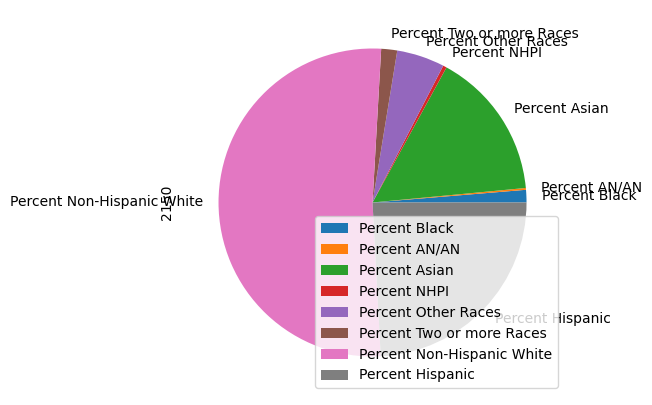

In [154]:
df_transpose=df_sample.transpose()
plot = df_transpose.plot.pie(y=2150, figsize=(5, 5))

#df_transpose.rename(columns = {'2150':'population'},inplace=True) 

#df_censuscounty.rename(columns = {'B01001_001E':'population'}, inplace=True)
#df_transpose

<div class="alert alert-block alert-success">
    <strong>Response to Exercise:</strong> We have mapped the population composition for one census tract. We can similarly do it for others, or get proportion of a particular race in a tract.
</div>

<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Now do the same using <strong>cenpy</strong>.
</div>

Here's the relevant example from the lecture. Note if you want multiple variables, you can pass them as a list. For example: `variables=['B25035_001E','B01001H_001E']`.


In [155]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()
riverside = products.ACS(2017).from_county('Riverside, CA', level='tract',
                                        variables='B25035_001E')
riverside.head()

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,B25035_001E,NAME,state,county,tract
0,06065043272,"POLYGON ((-13065671.600 3960598.630, -13065249...",1998.0,"Census Tract 432.72, Riverside County, California",06,065,043272
1,06065043228,"POLYGON ((-13049247.080 3972238.770, -13049240...",1994.0,"Census Tract 432.28, Riverside County, California",06,065,043228
2,06065049800,"POLYGON ((-13049262.000 3968743.130, -13049219...",2002.0,"Census Tract 498, Riverside County, California",06,065,049800
3,06065042724,"POLYGON ((-13041627.930 3988180.970, -13041627...",NaN,"Census Tract 427.24, Riverside County, California",06,065,042724
4,06065049600,"POLYGON ((-13043644.370 3966850.670, -13043615...",2003.0,"Census Tract 496, Riverside County, California",06,065,049600


In [160]:
# your code here
acs_tract = cenpy.products.ACS()
lacounty_tract = products.ACS(2017).from_county('Los Angeles, CA', level='tract',
                                        variables=('B01001_001E',
                                                   'B01001B_001E',
                                                   'B01001C_001E',
                                                   'B01001D_001E',
                                                   'B01001E_001E',
                                                   'B01001F_001E',
                                                   'B01001G_001E',
                                                   'B01001H_001E',
                                                   'B01001I_001E',))
lacounty_tract.rename(columns = {'B01001_001E':'Total Population',
                     'B01001B_001E':'Black',
                     'B01001C_001E':'AN/AN',
                     'B01001D_001E':'Asian',
                     'B01001E_001E':'NHPI',
                     'B01001F_001E':'Other Races',
                     'B01001G_001E':'Two or more Races',
                     'B01001I_001E':'Hispanic',
                     'B01001H_001E':'Non-Hispanic White',}, inplace=True)
lacounty_tract.head()

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,Black,AN/AN,Asian,NHPI,Other Races,Two or more Races,Non-Hispanic White,Hispanic,Total Population,NAME,state,county,tract
0,06037670324,"POLYGON ((-13181622.320 4001604.410, -13181397...",22.0,0.0,740.0,0.0,13.0,306.0,3687.0,513.0,5167.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324
1,06037670500,"POLYGON ((-13176441.290 3996934.430, -13176429...",11.0,4.0,281.0,0.0,19.0,75.0,1224.0,106.0,1684.0,"Census Tract 6705, Los Angeles County, California",06,037,670500
2,06037651101,"POLYGON ((-13174776.060 4002986.790, -13174774...",46.0,16.0,2382.0,6.0,222.0,216.0,2191.0,639.0,5414.0,"Census Tract 6511.01, Los Angeles County, Cali...",06,037,651101
3,06037297400,"POLYGON ((-13172981.590 3990813.920, -13172775...",96.0,0.0,198.0,0.0,66.0,152.0,2357.0,984.0,3701.0,"Census Tract 2974, Los Angeles County, California",06,037,297400
4,06037670100,"POLYGON ((-13172288.180 4000326.940, -13172287...",438.0,54.0,1056.0,0.0,629.0,531.0,2943.0,2173.0,7001.0,"Census Tract 6701, Los Angeles County, California",06,037,670100


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Can you write a function that retrieves population by race for all census tracts in a specified county? (Or a simplified measure of race, such as the proportion of Black people.) 
</div>

Hint: use the code you wrote, but replace the county FIPS code `037` with a variable. Your function can take a single argument, e.g. `countyFIPS`.

In [166]:
# your code here
def countymap(fips):
    acs_tract = cenpy.products.ACS()
    lacounty_tract = products.ACS(2017).from_county(fips, level='tract',
                                        variables=('B01001_001E',
                                                   'B01001B_001E',
                                                   'B01001C_001E',
                                                   'B01001D_001E',
                                                   'B01001E_001E',
                                                   'B01001F_001E',
                                                   'B01001G_001E',
                                                   'B01001H_001E',
                                                   'B01001I_001E',))
    lacounty_tract.rename(columns = {'B01001_001E':'Total Population',
                                     'B01001B_001E':'Black',
                                     'B01001C_001E':'AN/AN',
                                     'B01001D_001E':'Asian',
                                     'B01001E_001E':'NHPI',
                                     'B01001F_001E':'Other Races',
                                     'B01001G_001E':'Two or more Races',
                                     'B01001I_001E':'Hispanic',
                                     'B01001H_001E':'Non-Hispanic White',}, inplace=True)
    return(lacounty_tract)
    

<div class="alert alert-block alert-success">
<strong>Response to Exercise:</strong> The above is the code to retrieve population by race for all census tracts in a specified county. The fuction takes the county name (NOT FIPS) as the input and return the table containing the data. Below is an example of the function being called. 
</div>

In [168]:
df22=countymap('Los Angeles, CA')
df22.head()

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,Black,AN/AN,Asian,NHPI,Other Races,Two or more Races,Non-Hispanic White,Hispanic,Total Population,NAME,state,county,tract
0,06037670324,"POLYGON ((-13181622.320 4001604.410, -13181397...",22.0,0.0,740.0,0.0,13.0,306.0,3687.0,513.0,5167.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324
1,06037670500,"POLYGON ((-13176441.290 3996934.430, -13176429...",11.0,4.0,281.0,0.0,19.0,75.0,1224.0,106.0,1684.0,"Census Tract 6705, Los Angeles County, California",06,037,670500
2,06037651101,"POLYGON ((-13174776.060 4002986.790, -13174774...",46.0,16.0,2382.0,6.0,222.0,216.0,2191.0,639.0,5414.0,"Census Tract 6511.01, Los Angeles County, Cali...",06,037,651101
3,06037297400,"POLYGON ((-13172981.590 3990813.920, -13172775...",96.0,0.0,198.0,0.0,66.0,152.0,2357.0,984.0,3701.0,"Census Tract 2974, Los Angeles County, California",06,037,297400
4,06037670100,"POLYGON ((-13172288.180 4000326.940, -13172287...",438.0,54.0,1056.0,0.0,629.0,531.0,2943.0,2173.0,7001.0,"Census Tract 6701, Los Angeles County, California",06,037,670100


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Map your results!
</div>

<div class="alert alert-block alert-success">
<strong>Response to Exercise:</strong> Mapping total population in LA county!
</div>

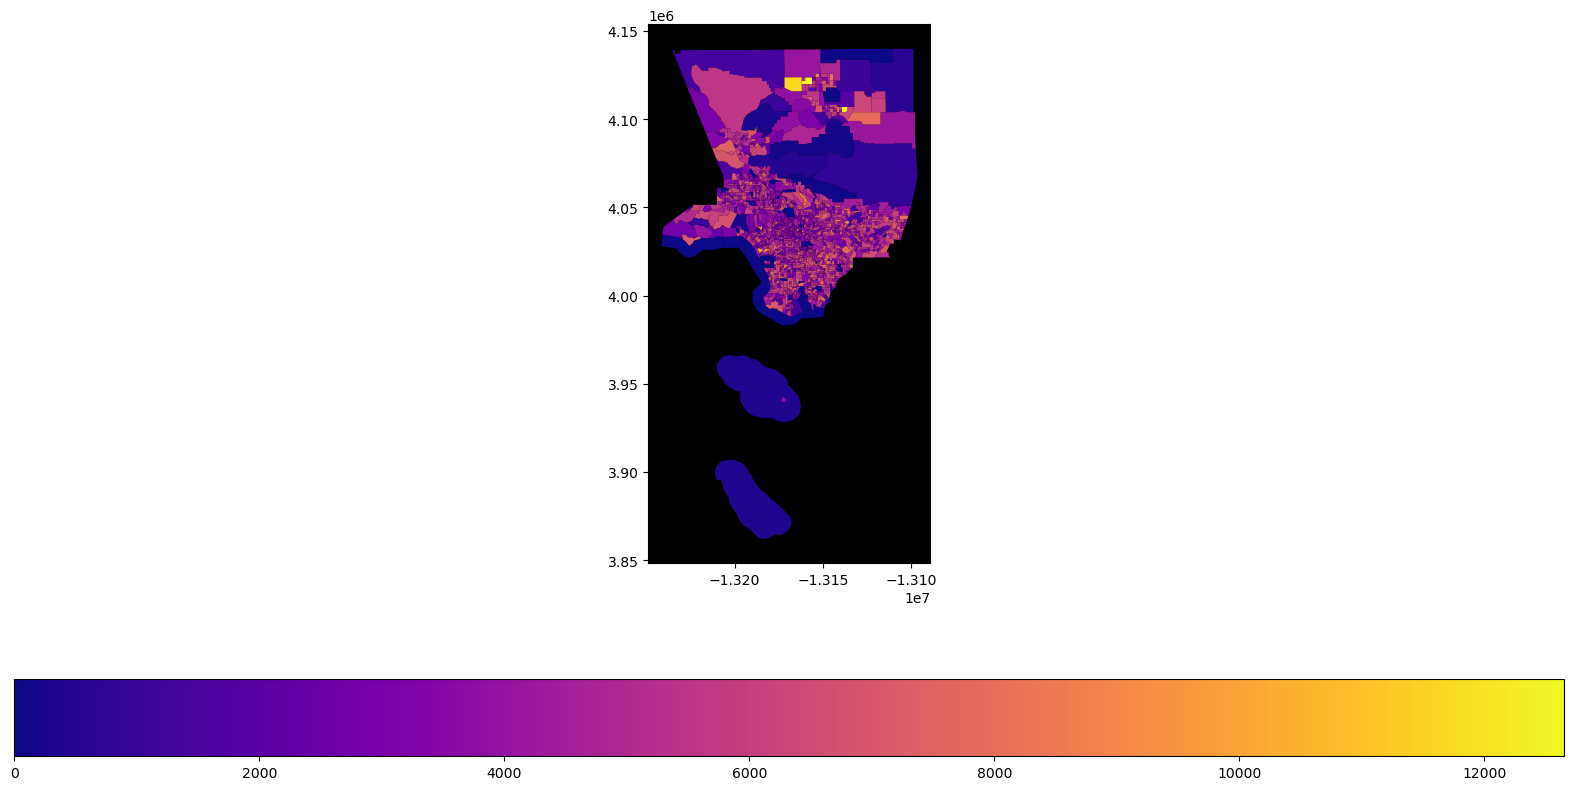

In [169]:
# your code here
import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(figsize=(20,10))

df22.plot('Total Population', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})
ax.set_facecolor('k')


### Using Socrata

Here's the example that we saw in the lecture.

<Axes: >

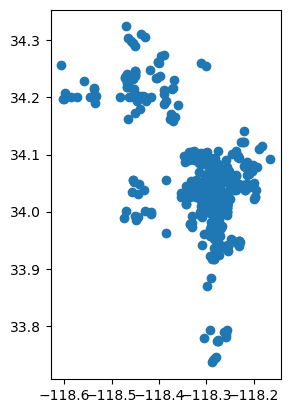

In [170]:
import geopandas as gpd
url = 'https://data.lacity.org/resource/mymu-zi3s.geojson'
gdf = gpd.read_file(url)
gdf.plot()

In [171]:
gpd.read_file?

Signature:
gpd.read_file(
    filename,
    bbox=None,
    mask=None,
    rows=None,
    engine=None,
    **kwargs,
)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. versionadded:: 0.7.0 mask, rows

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a shapely
    geometry. With engine="fiona", CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. With engine="pyogrio", bbox must be in the same CRS as the
    dataset. Tuple is (minx, miny, maxx, maxy) to match the bounds property of
    shapely geometry objects. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect wit

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Choose another dataset on Socrata, download it using the API, and map the results. 
</div>

The City of Los Angeles datasets are [here](https://data.lacity.org). Feel free to choose another city or county if you prefer.

Some possible datasets of planning-related interest:
* [DACA/DAPA workshops](https://data.lacity.org/Community-Economic-Development/Map2-DACA-DAPA-Workshops/icwt-9z3e) (seems a bit dated)
* [Solar PV permits](https://data.lacity.org/A-Prosperous-City/Solar-PV-Permits-in-LA/bdt7-w2xr)
* [Parks](https://data.lacity.org/Community-Economic-Development/Department-of-Recreation-and-Parks-Facility-and-Pa/ax8j-dhzm)

<Axes: >

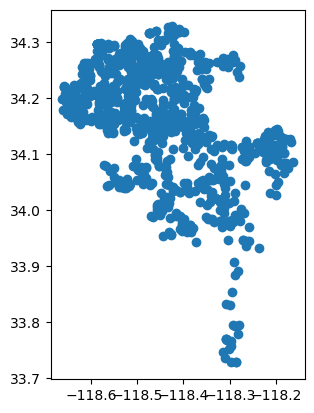

In [175]:
# your code here
url_parks = 'https://data.lacity.org/resource/bdt7-w2xr.geojson'
gdf_parks = gpd.read_file(url_parks)
gdf_parks.plot()

<Axes: >

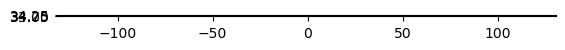

In [174]:
gdf_parks.plot()

In [ ]:
## do this. 
# clean it up a bit
import matplotlib.pyplot as plt
import contextily as ctx

# easier if we pre-create an axis object
fig, ax = plt.subplots(figsize=(10,10))

# project to 3857 to match the basemap
# use the markersize keyword to make the points smaller
gdf_parks.to_crs('EPSG:3857').plot(ax=ax, markersize=2)

# add a basemap
# for more options, see https://contextily.readthedocs.io/en/latest/providers_deepdive.html
# I chose xyz.OpenStreetMap.Mapnik
ctx.add_basemap(ax=ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# drop the tick labels
ax.set_xticks([])
ax.set_yticks([])

# add a title
ax.set_title('Solar PV permits, City of Los Angeles')

<div class="alert alert-block alert-success">
<strong>Response to Exercise:</strong>This is the solution, we have mapped the sv panel data. 
</div>

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain confidence in experimenting with code - exploring different objects, writing functions, and so on</li>
  <li>Learn how to read API documentation and adapt the examples to create your own queries.</li>
  <li>Gain confidence in mapping the results. We'll practice this much more throughout the quarter.</li>
</ul>
</div>